## Course: DSC530
## Assignment: Weeks 5 & 6 Exercises
## Name: Laura Hoffmann
## Date: 1/22/2021

## Activity 7
### Import all of the necessary libraries

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

### Inspecting the URL

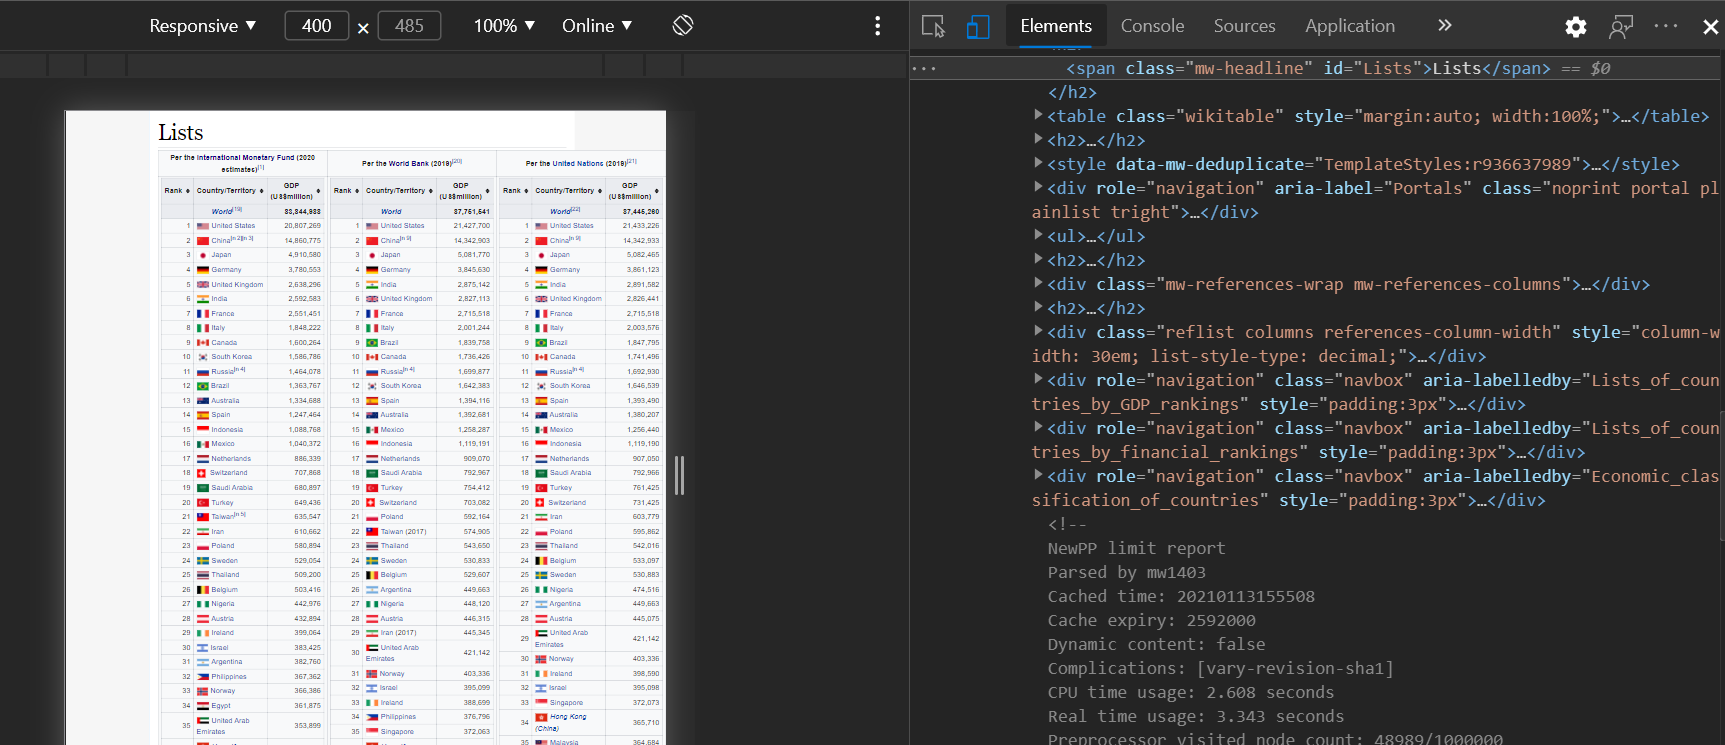

### Open the URL, find the number of tables, and the desired data

In [2]:
listofdf = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)", header=0) # pulls data frames
len(listofdf)

10

In [3]:
for df in listofdf: # for every data frame on the web page 
    print(df.shape) # print the length and width of the data

(0, 1)
(0, 3)
(604, 3)
(196, 3)
(191, 3)
(213, 3)
(7, 2)
(9, 2)
(12, 2)
(1, 2)


### Open the URL with beautiful soup, find the structure and number of tables

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
response = requests.get(url) # retrieves data from the url
soup = BeautifulSoup(response.content,'html.parser') # soup equals the url content using HTML parser for easier reading

In [5]:
tables = soup.find_all("table") # finds the data tables and sets equal to variable tables
print("On this web page there are {} tables.".format(len(tables)))

On this web page there are 10 tables.


### Find the right table

In [6]:
righttable = soup.find("table", {"class": "wikitable"}) # uses class attribute wikitable to find the right table to use
print(type(righttable))

<class 'bs4.element.Tag'>


### Separate the source and the actual data

In [7]:
sources = righttable.tbody.findAll('tr', recursive=False)[0] 
sourcelist = [td for td in sources.findAll('td')] # finds all of the data tables using the righttable wikitable attribute
print("The number of tables is {}".format(len(sourcelist)))

The number of tables is 3


In [8]:
data = righttable.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False) # finds data from righttable body tag

In [9]:
tables = [] # creates an empty list 
for td in data: #searches data variable
    tables.append(td.findAll('table')) # appends each correct data frame to the empty list

In [10]:
print("The number of sources is {}".format(len(tables)))

The number of sources is 3


### Get the source names

In [11]:
namelist = righttable.tbody.tr.findAll('b') # Uses bold tag as a filter to pull out the source titles
title = []
for i in namelist:
    title.append(i.getText()) # finds the titles of the data frames and appends to the list of titles
print("Source names:")
for name in title:
    print(name)

Source names:
Per the International Monetary Fund (2020 estimates)
Per the World Bank (2019)
Per the United Nations (2019)


### Separate the header and data for the first source

In [12]:
firsthead = [th.getText().strip() for th in tables[0][0].findAll('th')] # [0][0] indicates the first table
# Uses table header tag as the filter to pull out the table variables
# Uses the strip function to remove whitespace
firsthead # prints the headers (or variables) for the first table

['Rank', 'Country/Territory', 'GDP(US$million)']

### Create a data frame using that

In [13]:
firstrows = tables[0][0].findAll('tbody')[0].findAll('tr')[1:] # retrieves the rows from the data (tr meaning table rows)

In [14]:
dfrows = [[td.get_text().strip() for td in tr.findAll('td')] for tr in firstrows] # retrieves the data in those rows

In [15]:
df1 = pd.DataFrame(dfrows, columns=firsthead) # sets the data frame equal to the retrieved rows and specified columns
print("Per the International Monetary Fund")
df1.head() # prints first 5 rows of said data frame

Per the International Monetary Fund


,Rank,Country/Territory,GDP(US$million)
0,,World[19],"83,844,988"
1,1,United States,"20,807,269"
2,2,China[n 2][n 3],"14,860,775"
3,3,Japan,"4,910,580"
4,4,Germany,"3,780,553"


### Repeated for World Bank

In [16]:
secondhead = [th.getText().strip() for th in tables[1][0].findAll('th')] #[1][0] indicates the second table
# Uses table header tag as the filter to pull out the table variables
# Uses the strip function to remove whitespace
secondhead # prints the headers (or variables) for the first table

['Rank', 'Country/Territory', 'GDP(US$million)']

In [17]:
secondrows = tables[1][0].findAll('tbody')[0].findAll('tr')[1:] # retrieves the rows from the data (tr meaning table rows)

In [18]:
dfrows2 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in secondrows] # retrieves the data in those rows

In [19]:
df2 = pd.DataFrame(dfrows2, columns=secondhead) # sets the data frame equal to the retrieved rows and specified columns
print("Per the World Bank")
df2.head()

Per the World Bank


,Rank,Country/Territory,GDP(US$million)
0,,World,"87,751,541"
1,1,United States,"21,427,700"
2,2,China[n 9],"14,342,903"
3,3,Japan,"5,081,770"
4,4,Germany,"3,845,630"


### Repeated for UN

In [20]:
thirdhead = [th.getText().strip() for th in tables[2][0].findAll('th')]
# Uses table header tag as the filter to pull out the table variables
# Uses the strip function to remove whitespace
thirdhead # prints the headers (or variables) for the first table

['Rank', 'Country/Territory', 'GDP(US$million)']

In [21]:
thirdrows = tables[2][0].findAll('tbody')[0].findAll('tr')[1:] # retrieves the rows from the data (tr meaning table rows)

In [22]:
dfrows3 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in thirdrows] # retrieves the data in those rows

In [23]:
df3 = pd.DataFrame(dfrows3, columns=thirdhead) # sets the data frame equal to the retrieved rows and specified columns
print("Per the United Nations")
df3.head()

Per the United Nations


,Rank,Country/Territory,GDP(US$million)
0,,World[22],"87,445,260"
1,1,United States,"21,433,226"
2,2,China[n 9],"14,342,933"
3,3,Japan,"5,082,465"
4,4,Germany,"3,861,123"


## Activity 8

### Read the cvs file and import the extra libraries

In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

visitdata = pd.read_csv("visit_data.csv")
visitdata.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


### Check for duplicate records

In [25]:
print("There are no duplicated IDs - {}".format(visitdata.id.is_unique)) # are all IDs unique?
print("There are no duplicated first names - {}".format(visitdata.first_name.is_unique)) # are all first names unique?
print("There are no duplicated last names - {}".format(visitdata.last_name.is_unique)) # are all last names unique?
print("There are no duplicated emails - {}".format(visitdata.email.is_unique)) # are all emails unique?
# genders will not be unique
print("There are no duplicated IP addresses - {}".format(visitdata.ip_address.is_unique)) # are all ip addresses unique?
print("There are no duplicated visits - {}".format(visitdata.visit.is_unique)) # are all visits unique?

There are no duplicated IDs - True
There are no duplicated first names - False
There are no duplicated last names - False
There are no duplicated emails - True
There are no duplicated IP addresses - True
There are no duplicated visits - False


#### There are duplicated first and last names and visits but no duplicated IDs, emails, or IP addresses

### Check to see if essential columns contain null values

In [26]:
for c in visitdata.columns:
    miss = visitdata[c].isnull().sum()
    if miss>0: # If there are more than 0 missing values this operation will print the number of missing values
        print("{} has {} missing values.".format(c,miss))
    else:      # If there are 0 missing values this operation will print how many are missing
        print("{} has NO missing values.".format(c))
        
# I am unsure as to which columns are considered essential so I ran this code to go through every column to test
# for null/missing values and print the number of missing values each column has. As a result, we can see that the first 
# and last name columns both have 296 missing values, gender has 505 missing, and visit has 26 missing while the
# rest of the columns have 0 missing values.

id has NO missing values.
first_name has 296 missing values.
last_name has 296 missing values.
email has NO missing values.
gender has 505 missing values.
ip_address has NO missing values.
visit has 26 missing values.


### Get rid of outliers

In [27]:
# it seems as though the only column to rightfully test outliers on would be visit
cleanvisit = visitdata[np.isfinite(visitdata['visit'])] 
# This operation gets rid of the null values in the visit column
# Because there were 26, the new data frame should be 26 less rows than the original

### Report the size difference

In [28]:
print(visitdata.shape)
print(cleanvisit.shape)
# There are indeed 26 less rows, as the original held 1000 rows the new data frame took out the 26 missing values
# and now reports 974 rows.

(1000, 7)
(974, 7)


### Create a box plot to check for outliers

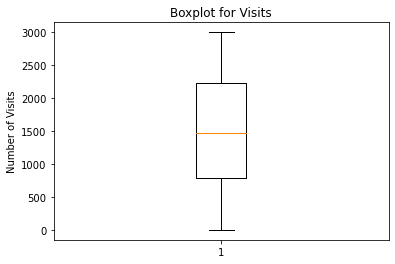

In [29]:
plt.boxplot(cleanvisit.visit)
plt.title("Boxplot for Visits") # Titles the boxplot
plt.ylabel("Number of Visits") # Labels the y-axis
plt.show()
# The boxplot does not picture any outlying points beyond the whiskers

### Get rid of outliers

In [30]:
# Start by finding the lowest and highest zscores
print(stats.zscore(cleanvisit['visit']).min())
print(stats.zscore(cleanvisit['visit']).max())

-1.785241741533329
1.7888757591039082


In [31]:
upper_quartile = np.percentile(cleanvisit['visit'], 95) # Sets the 95th percentile
lower_quartile = np.percentile(cleanvisit['visit'], 5) # Sets the 5th percentile
upper_whisker = cleanvisit['visit'][cleanvisit['visit']<=upper_quartile].max()
print(upper_whisker) # These functions find the number in the data that correspond with the 95th percentile
lower_whisker = cleanvisit['visit'][cleanvisit['visit']>=lower_quartile].min()
print(lower_whisker) # These functions find the number in the data that correspond with the 5th percentile

2849.0
204.0


In [32]:
newdata = cleanvisit[(cleanvisit['visit']<=2849) & (cleanvisit['visit']>=204)]
print("After removing outliers the new shape of the data is {} entries".format(*newdata.shape))

After removing outliers the new shape of the data is 877 entries


## SQL Lite Databases

In [33]:
import sqlite3
import random
from datetime import datetime

In [34]:
query = """
CREATE TABLE test
(Name, Address, City, State, Zip Code, Phone Number);"""
# This names the variables or the columns that title the table

In [35]:
con = sqlite3.connect('mydata.sqlite')  
# Creates a new file for the table, the first time it's run, or references the existing file

In [36]:
con.execute('DROP table IF EXISTS test;') 
# If table test already exists it will be deleted
con.execute(query)
# Creates new table named test

In [37]:
con.commit() # Commits the column headings

In [38]:
sqldata = [
    ('Andy Dwyer', '{} Henkle Drive'.format(random.randint(100,9999)), 'Pawnee', 'Indiana', 62558, random.randint(1000000000,9999999999)),
    ('Angela Martin', '{} Throop Street'.format(random.randint(100,9999)), 'Scranton', 'Pennsylvania', 18509, random.randint(1000000000,9999999999)),
    ('April Ludgate', '{} Jefferson Street'.format(random.randint(100,9999)), 'Pawnee', 'Indiana', 62558, random.randint(1000000000,9999999999)),
    ('Ben Wyatt', '{} 8th Street'.format(random.randint(100,9999)), 'Pawnee', 'Indiana', 62558, random.randint(1000000000,9999999999)),
    ('Dwight Shrute', '{} Shrute Farms Lane'.format(random.randint(100,9999)), 'Scranton', 'Pennsylvania', 18512, random.randint(1000000000,9999999999)),
    ('Jim Halpert', '{} Linden Street'.format(random.randint(100,9999)), 'Scranton', 'Pennsylvania', 18519, random.randint(1000000000,9999999999)),
    ('Leslie Knope', '{} Cahokia Drive'.format(random.randint(100,9999)), 'Pawnee', 'Indiana', 62558, random.randint(1000000000,9999999999)),
    ('Michael Scott', '{} Arlington Way'.format(random.randint(100,9999)), 'Scranton', 'Pennsylvania', 18503, random.randint(1000000000,9999999999)),
    ('Pam Beesly', '{} Rutland Court'.format(random.randint(100,9999)), 'Scranton', 'Pennsylvania', 18506, random.randint(1000000000,9999999999)),
    ('Ronald Swanson', 'Redacted', "Pawnee", 'Indiana', 'Redacted', 'Redacted'),
    ('Stanley Hudson', '{} Cronkey Avenue'.format(random.randint(100,9999)), 'Scranton', 'Pennsylvania', 18519, random.randint(1000000000,9999999999)),
    ('Tom Haverford', '{} Michele Drive'.format(random.randint(100,9999)), 'Pawnee', 'Indiana', 62558, random.randint(1000000000,9999999999))]

In [39]:
stmt = "Insert into test values(?, ?, ?, ?, ?, ?)" #headings

In [40]:
con.executemany(stmt,sqldata) # inputs the headings and data

In [41]:
con.commit() # Commits the data using the headings

In [42]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

[('Andy Dwyer', '8047 Henkle Drive', 'Pawnee', 'Indiana', 62558, 7712322747),
 ('Angela Martin',
  '7133 Throop Street',
  'Scranton',
  'Pennsylvania',
  18509,
  5915329384),
 ('April Ludgate',
  '3690 Jefferson Street',
  'Pawnee',
  'Indiana',
  62558,
  6412759762),
 ('Ben Wyatt', '2923 8th Street', 'Pawnee', 'Indiana', 62558, 1522311725),
 ('Dwight Shrute',
  '559 Shrute Farms Lane',
  'Scranton',
  'Pennsylvania',
  18512,
  5668997879),
 ('Jim Halpert',
  '3981 Linden Street',
  'Scranton',
  'Pennsylvania',
  18519,
  8068966325),
 ('Leslie Knope',
  '9812 Cahokia Drive',
  'Pawnee',
  'Indiana',
  62558,
  9758891836),
 ('Michael Scott',
  '4499 Arlington Way',
  'Scranton',
  'Pennsylvania',
  18503,
  2442884516),
 ('Pam Beesly',
  '996 Rutland Court',
  'Scranton',
  'Pennsylvania',
  18506,
  2206383780),
 ('Ronald Swanson', 'Redacted', 'Pawnee', 'Indiana', 'Redacted', 'Redacted'),
 ('Stanley Hudson',
  '3067 Cronkey Avenue',
  'Scranton',
  'Pennsylvania',
  18519,
  869

In [43]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description]) # Creates and prints the pandas data frame

,Name,Address,City,State,Zip,Phone
0,Andy Dwyer,8047 Henkle Drive,Pawnee,Indiana,62558,7712322747
1,Angela Martin,7133 Throop Street,Scranton,Pennsylvania,18509,5915329384
2,April Ludgate,3690 Jefferson Street,Pawnee,Indiana,62558,6412759762
3,Ben Wyatt,2923 8th Street,Pawnee,Indiana,62558,1522311725
4,Dwight Shrute,559 Shrute Farms Lane,Scranton,Pennsylvania,18512,5668997879
5,Jim Halpert,3981 Linden Street,Scranton,Pennsylvania,18519,8068966325
6,Leslie Knope,9812 Cahokia Drive,Pawnee,Indiana,62558,9758891836
7,Michael Scott,4499 Arlington Way,Scranton,Pennsylvania,18503,2442884516
8,Pam Beesly,996 Rutland Court,Scranton,Pennsylvania,18506,2206383780
9,Ronald Swanson,Redacted,Pawnee,Indiana,Redacted,Redacted
